# Image Captioning using Deep Learning: Assignment-2

*  In this assignment, we will build a classifier for MNIST from using [PyTorch](https://pytorch.org/docs/stable/index.html). 

*   No limitations on your model this time, just don't use CNNs now, that's up next week.

**Feel free to redefine any pre-written cells below, just make sure to properly explain your work in Markdown and don't change the dataset**

## Import libraries here
PyTorch, NumPy, Matplotlib, ...
Even when equipped with PyTorch, NumPy and Matplotlib make your work easier for visualization etc.

Also remember to **initialize the seed** for reproducibility of results, both for NumPy & PyTorch.

In [70]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch

seed=232
np.random.seed(seed)
torch.backends.cudnn.enabled = False
torch.manual_seed(seed)


## Load *Dataset*
**DON'T CHANGE THIS CODE**.

In [71]:
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

# Your Code from here...

In [72]:
# load the data set
from sklearn.model_selection import train_test_split

X = train.data
y = train.targets

mean_X=torch.mean(torch.Tensor.float(X))
std_X=torch.std(torch.Tensor.float(X))
# normalize the dataset, won't be doing it here in later assignments
X=torch.flatten(X,start_dim=1)
X=(X-mean_X)/std_X

# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=40,shuffle=True)


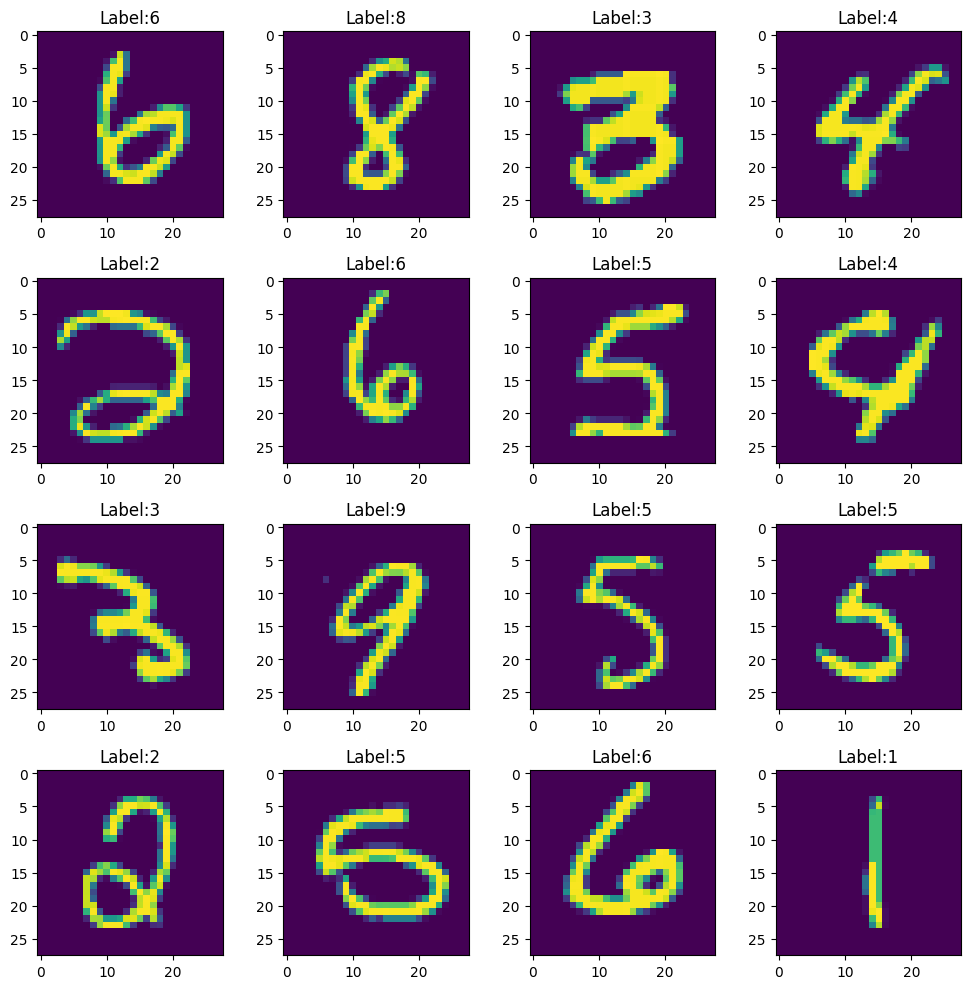

In [73]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
fig, axes=plt.subplots(4,4,figsize=(10,10))

for i in range(16):
    chosen=np.random.randint(0,60000)
    image=X[chosen]
    image=image.reshape(28,28)
    ax=axes[i//4,i%4]
    ax.imshow(image)
    ax.set_title('Label:{}'.format(y[chosen]))
plt.tight_layout()
plt.show()

In [74]:
# define your dataset for pre-processing into Neural Network


#no preprocessing done for now



## ```nn.Module``` for your model
In this segment, define a class for your model, it has to inherit from the ```nn.Module``` class. You must define two functions here - ```__init__``` and ```forward```, again pretty self-explanatory. Helper functions can also be implemented, your choice!

Look into the following ```torch``` layers and combine them to form your network, you can find more [here](https://pytorch.org/docs/stable/nn.html) -
- [```nn.Linear```](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [```nn.ReLU```](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
- [```nn.BatchNorm1d```](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html)


In [75]:
# define a child class of nn.Module for your model
# specify the architecture here itself

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(784,200)
        self.bn1=nn.BatchNorm1d(200)
        self.rel=nn.ReLU()
        self.fc2=nn.Linear(200,50)
        self.bn2=nn.BatchNorm1d(50)
        
        self.fc3=nn.Linear(50,10)
        self.softmx=nn.Softmax(dim=-1)
    def forward(self,x):
        x=self.rel(self.bn1(self.fc1(x)))
        x=self.rel(self.bn2(self.fc2(x)))
        x=self.softmx(self.fc3(x))
        return x

        

## Training loop
You can write a training loop but usually writing it within a function helps so that you can train in multiple passes with just one function call if you still don't see convergence of the loss. ```display_step``` is for you to display results on the validation set (which you must not have trained upon).

You will need to use ```zero_grad()```, ```backward()``` and multiple such functions here. Look for them in the tutorials given.

In [76]:
n_epochs = 10
batch_size_train = 150
learning_rate = 0.01
momentum = 0.9
log_interval = 20

In [77]:
def train(model, optimizer, criterion, train_loader, display_step=None):
    running_loss=0
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output=model(data)
        loss=criterion(output,target)
        # print(loss.item(),end=" ")
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        if batch_idx%log_interval==(log_interval-1):
            print(f'[{batch_idx + 1:5d}] loss: {running_loss :.3f}')
            running_loss=0
            
    print("finished")

## Prediction & Accuracy
Prediction function should predict outputs using your trained model for a given **NumPy array** ```X_test``` and the output should be another **NumPy array**.

The accuracy function would be the same as before.

In [78]:
def predict(model, X_tes):
    _,predicted=torch.max(model(X_tes),1)
    return predicted

In [79]:
def accuracy(pred, labels):
    total=labels.size(0)
    correct=(pred==labels).sum().item()
    return 100*correct/total

## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [80]:
Normalized_train=[]
for i in range(X_train.shape[0]):
    Normalized_train.append([X_train[i],y_train[i]])
# Normalized_val=[]
# for i in range(X_test.shape[0]):
#     Normalized_val.append([X_test[i],y_test[i]])

torch.backends.cudnn.enabled = False
torch.manual_seed(seed)

In [81]:
train_loader = torch.utils.data.DataLoader(Normalized_train, batch_size=batch_size_train,shuffle=False)
# test_loader = torch.utils.data.DataLoader(Normalized_val, batch_size=batch_size_test,shuffle=True)
# torch.backends.cudnn.enabled = False
# torch.manual_seed(seed)
network=Net()
optimizer=optim.SGD(network.parameters(),lr=learning_rate,momentum=momentum)
for i in range(n_epochs):
    train(network,optimizer=optimizer,criterion=F.nll_loss,train_loader=train_loader)


[   20] loss: -2.396
[   40] loss: -4.940
[   60] loss: -7.070
[   80] loss: -8.743
[  100] loss: -10.296
[  120] loss: -11.600
[  140] loss: -13.002
[  160] loss: -13.243
[  180] loss: -13.961
[  200] loss: -14.202
[  220] loss: -14.662
[  240] loss: -15.317
[  260] loss: -15.709
[  280] loss: -16.242
[  300] loss: -16.649
[  320] loss: -17.026
finished
[   20] loss: -17.124
[   40] loss: -17.504
[   60] loss: -17.515
[   80] loss: -17.843
[  100] loss: -17.700
[  120] loss: -17.848
[  140] loss: -18.160
[  160] loss: -18.232
[  180] loss: -18.285
[  200] loss: -18.220
[  220] loss: -18.464
[  240] loss: -18.393
[  260] loss: -18.466
[  280] loss: -18.532
[  300] loss: -18.542
[  320] loss: -18.656
finished
[   20] loss: -18.570
[   40] loss: -18.712
[   60] loss: -18.632
[   80] loss: -18.759
[  100] loss: -18.617
[  120] loss: -18.679
[  140] loss: -18.862
[  160] loss: -18.931
[  180] loss: -18.936
[  200] loss: -18.819
[  220] loss: -19.024
[  240] loss: -18.960
[  260] loss: -18.

## Run your model for the validation dataset
Use your trained model to get predictions for the validation dataset you split earlier.

In [82]:
k=predict(network,X_tes=X_test)
accuracy(k,y_test)

97.79166666666667

In [83]:
final_model=Net()

final_train=[]
for i in range(X.shape[0]):
    final_train.append([X[i],y[i]])
    
train_final = torch.utils.data.DataLoader(final_train, batch_size=batch_size_train,shuffle=False)
    

final_optimizer=optim.SGD(final_model.parameters(),lr=learning_rate,momentum=momentum)
for i in range(n_epochs):
    train(final_model,optimizer=final_optimizer,criterion=F.nll_loss,train_loader=train_final)


[   20] loss: -2.893
[   40] loss: -5.929
[   60] loss: -8.113
[   80] loss: -9.906
[  100] loss: -10.777
[  120] loss: -12.332
[  140] loss: -13.751
[  160] loss: -14.328
[  180] loss: -14.882
[  200] loss: -15.240
[  220] loss: -15.192
[  240] loss: -16.120
[  260] loss: -15.960
[  280] loss: -16.198
[  300] loss: -16.341
[  320] loss: -16.366
[  340] loss: -16.687
[  360] loss: -17.205
[  380] loss: -17.607
[  400] loss: -18.232
finished
[   20] loss: -17.854
[   40] loss: -18.089
[   60] loss: -17.852
[   80] loss: -18.273
[  100] loss: -17.796
[  120] loss: -18.061
[  140] loss: -18.426
[  160] loss: -18.387
[  180] loss: -18.443
[  200] loss: -18.333
[  220] loss: -18.273
[  240] loss: -18.664
[  260] loss: -18.445
[  280] loss: -18.588
[  300] loss: -18.583
[  320] loss: -18.468
[  340] loss: -18.536
[  360] loss: -18.714
[  380] loss: -18.887
[  400] loss: -19.223
finished
[   20] loss: -18.838
[   40] loss: -18.977
[   60] loss: -18.763
[   80] loss: -19.005
[  100] loss: -18.

## Submission
To submit your solution, you will need to make a file with name ```model.py``` containing imports necessary to write the model class and the model class itself. It shouldn't do anything else when run. Other than this, save the trained model in a file named ```ass_2.pt```. When you are done with the assignment, commit the updated notebook, the ```model.py``` class file and the ```ass_2.pt``` model-weights file to the repository.

In [84]:
# from google.colab import files
torch.save(final_model, 'ass_2.pt')
# files.download('ass_2.pt') # download the file from the Colab session for submission

Check if it got saved right!

In [85]:
# load the model, use predict function
saved_model=Net()
saved_model=torch.load('ass_2.pt')
saved_model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (bn1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (rel): ReLU()
  (fc2): Linear(in_features=200, out_features=50, bias=True)
  (bn2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
  (softmx): Softmax(dim=-1)
)

In [86]:
with torch.no_grad():
    final_test=test.data
    final_test=torch.flatten(final_test,start_dim=1)
    final_test=(final_test-mean_X)/std_X

    final_preds=predict(saved_model,X_tes=final_test)
accuracy(final_preds,test.targets)


97.72